# Background



- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 
- The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic  - measurements included in the dataset. 
- Several constraints were placed on the selection of these instances from a larger database. 
- In particular, all patients here are females at least 21 years old of Pima Indian heritage.

The Pima Indian Diabetes data set consists of:

- 1) Pregnancies: Number of times pregnant
- 2) Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- 3) BloodPressure: Diastolic blood pressure (mm Hg)
- 4) SkinThickness: Triceps skin fold thickness (mm)
- 5) Insulin: 2-Hour serum insulin (mu U/ml)
- 6) BMI: Body mass index (weight in kg/(height in m)^2)
- 7) DiabetesPedigreeFunction: Diabetes pedigree function
- 8) Age: Age (years)
- 9) Outcome: Class variable (0 or 1) 268 of 768 are 1, the others are 0

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Read file 

In [3]:
db = pd.read_csv('diabetes.csv')
db.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
db.shape

(768, 9)

In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Check Duplicate

In [5]:
db.duplicated().sum()

0

## Check is null

In [6]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
db.describe().T

# Abnormal zero values for Glucose, Blood Pressure, Skin Thickness, Insulin and BMI.

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Check initial distribution

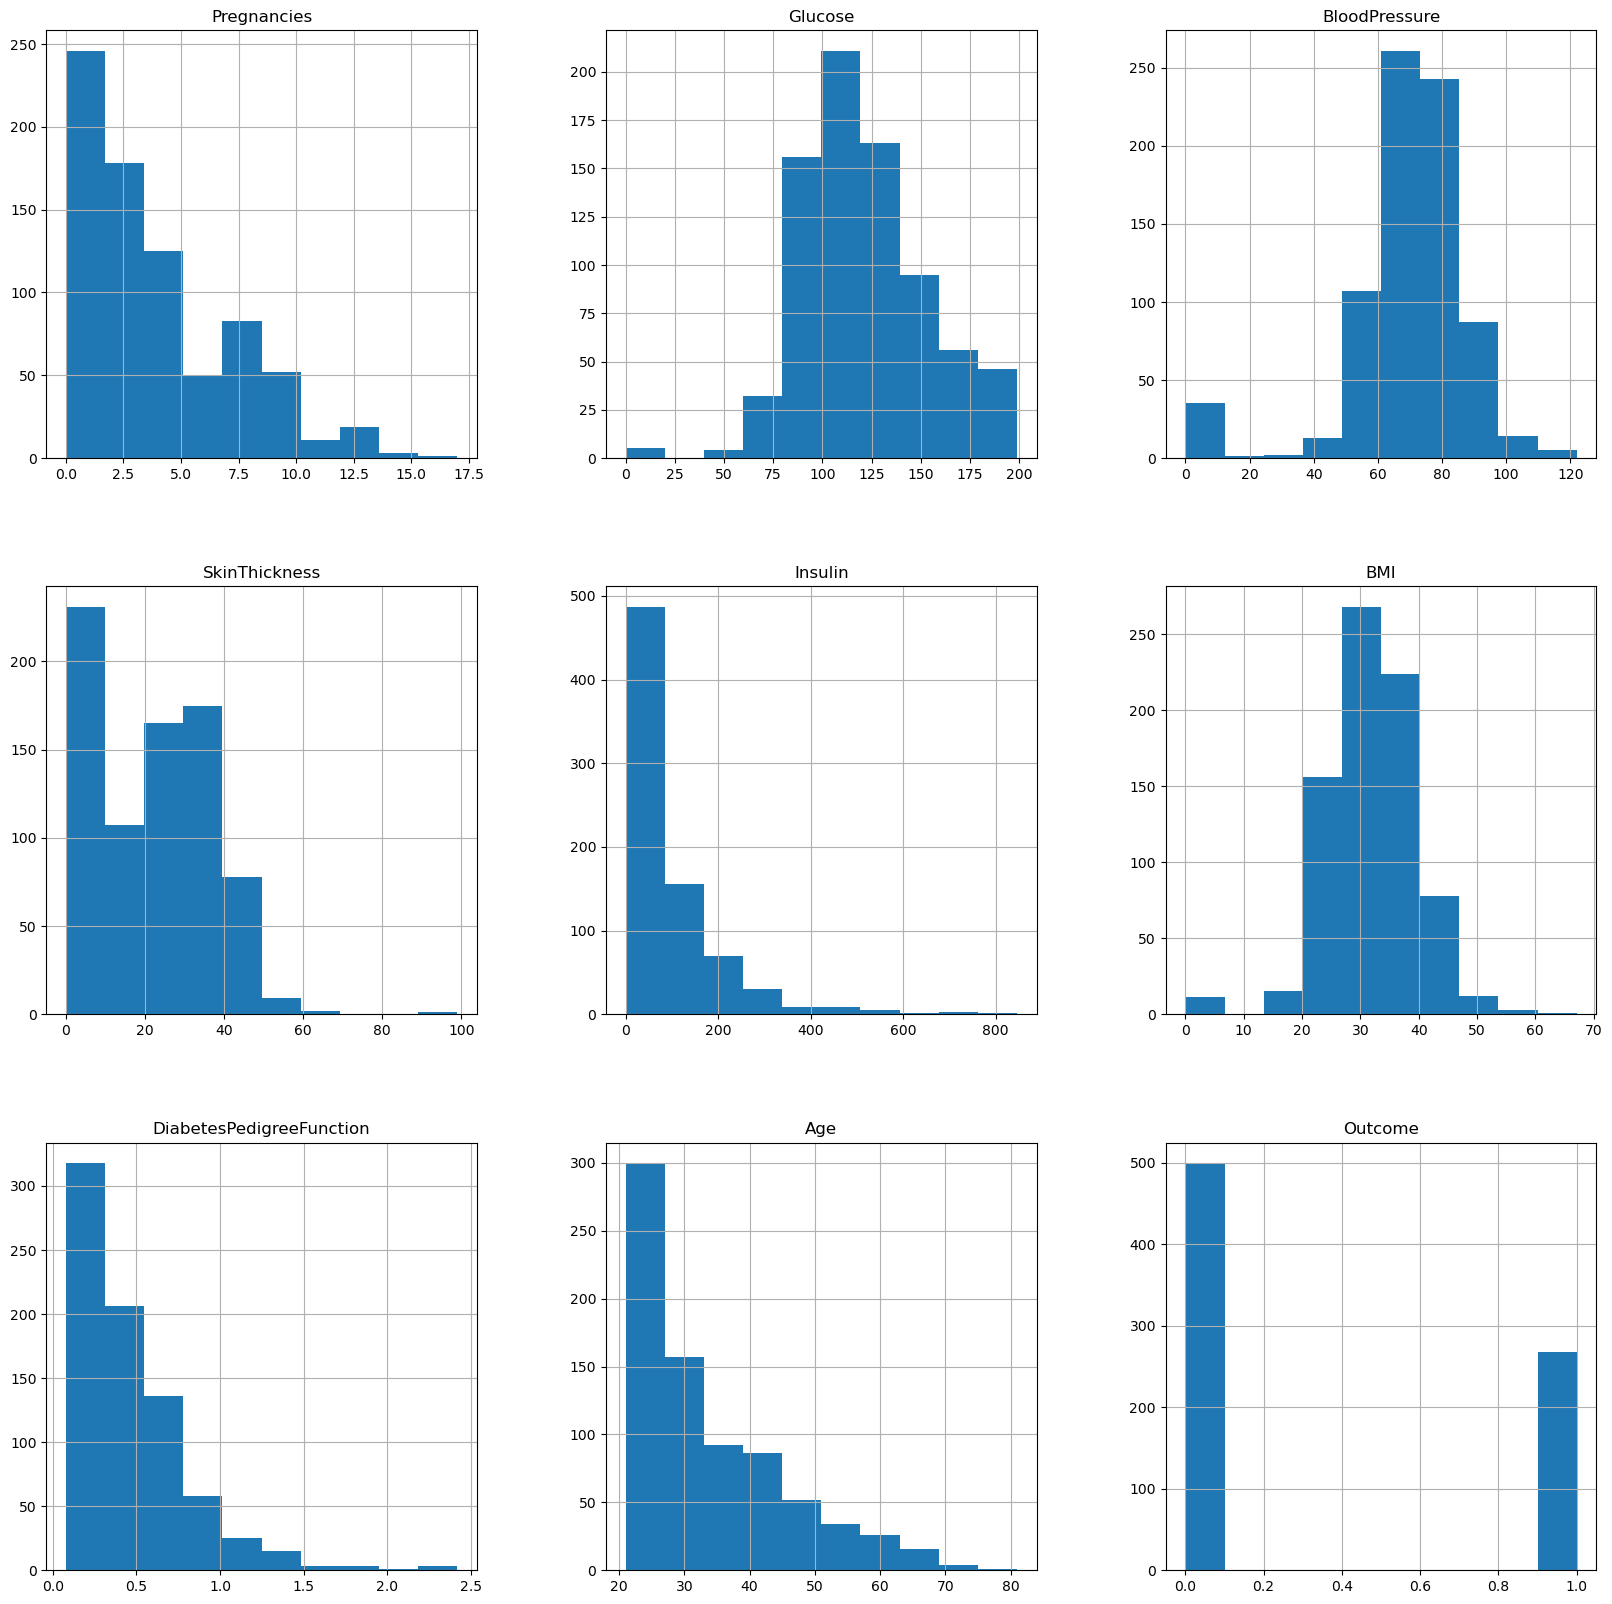

In [8]:
p = db.hist(figsize = (20,20))




## Replacing zeros with NAN

In [4]:

db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = db[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [5]:
db.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
db.isnull().sum()/len(db)

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

## Imputing  NAN  values with mean / median 

In [7]:
db['Glucose'].fillna(db['Glucose'].mean(), inplace = True)

db['BloodPressure'].fillna(db['BloodPressure'].mean(), inplace = True)

db['SkinThickness'].fillna(db.groupby(by=['Age'])['SkinThickness'].transform("median"), inplace = True)

#https://pubmed.ncbi.nlm.nih.gov/2384222/


db['Insulin'].fillna(db.groupby(by=['Age'])['Insulin'].transform("median"), inplace = True)

#https://www.medicalnewstoday.com/articles/267241
#“It’s extremely interesting that low levels of insulin are produced in most people with type 1 diabetes, 
# even if they’ve had it for 50 years.

#https://pubmed.ncbi.nlm.nih.gov/8829267/
#insuline resistance grows with age


db['BMI'].fillna(db['BMI'].median(), inplace = True)

## Checking isnull

In [8]:
db.isnull().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               12
Insulin                     20
BMI                          0
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [9]:
db['SkinThickness'].fillna(db['SkinThickness'].median(), inplace = True)

db['Insulin'].fillna(db['Insulin'].median(), inplace = True)


In [15]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Distribution after Imputing zero values

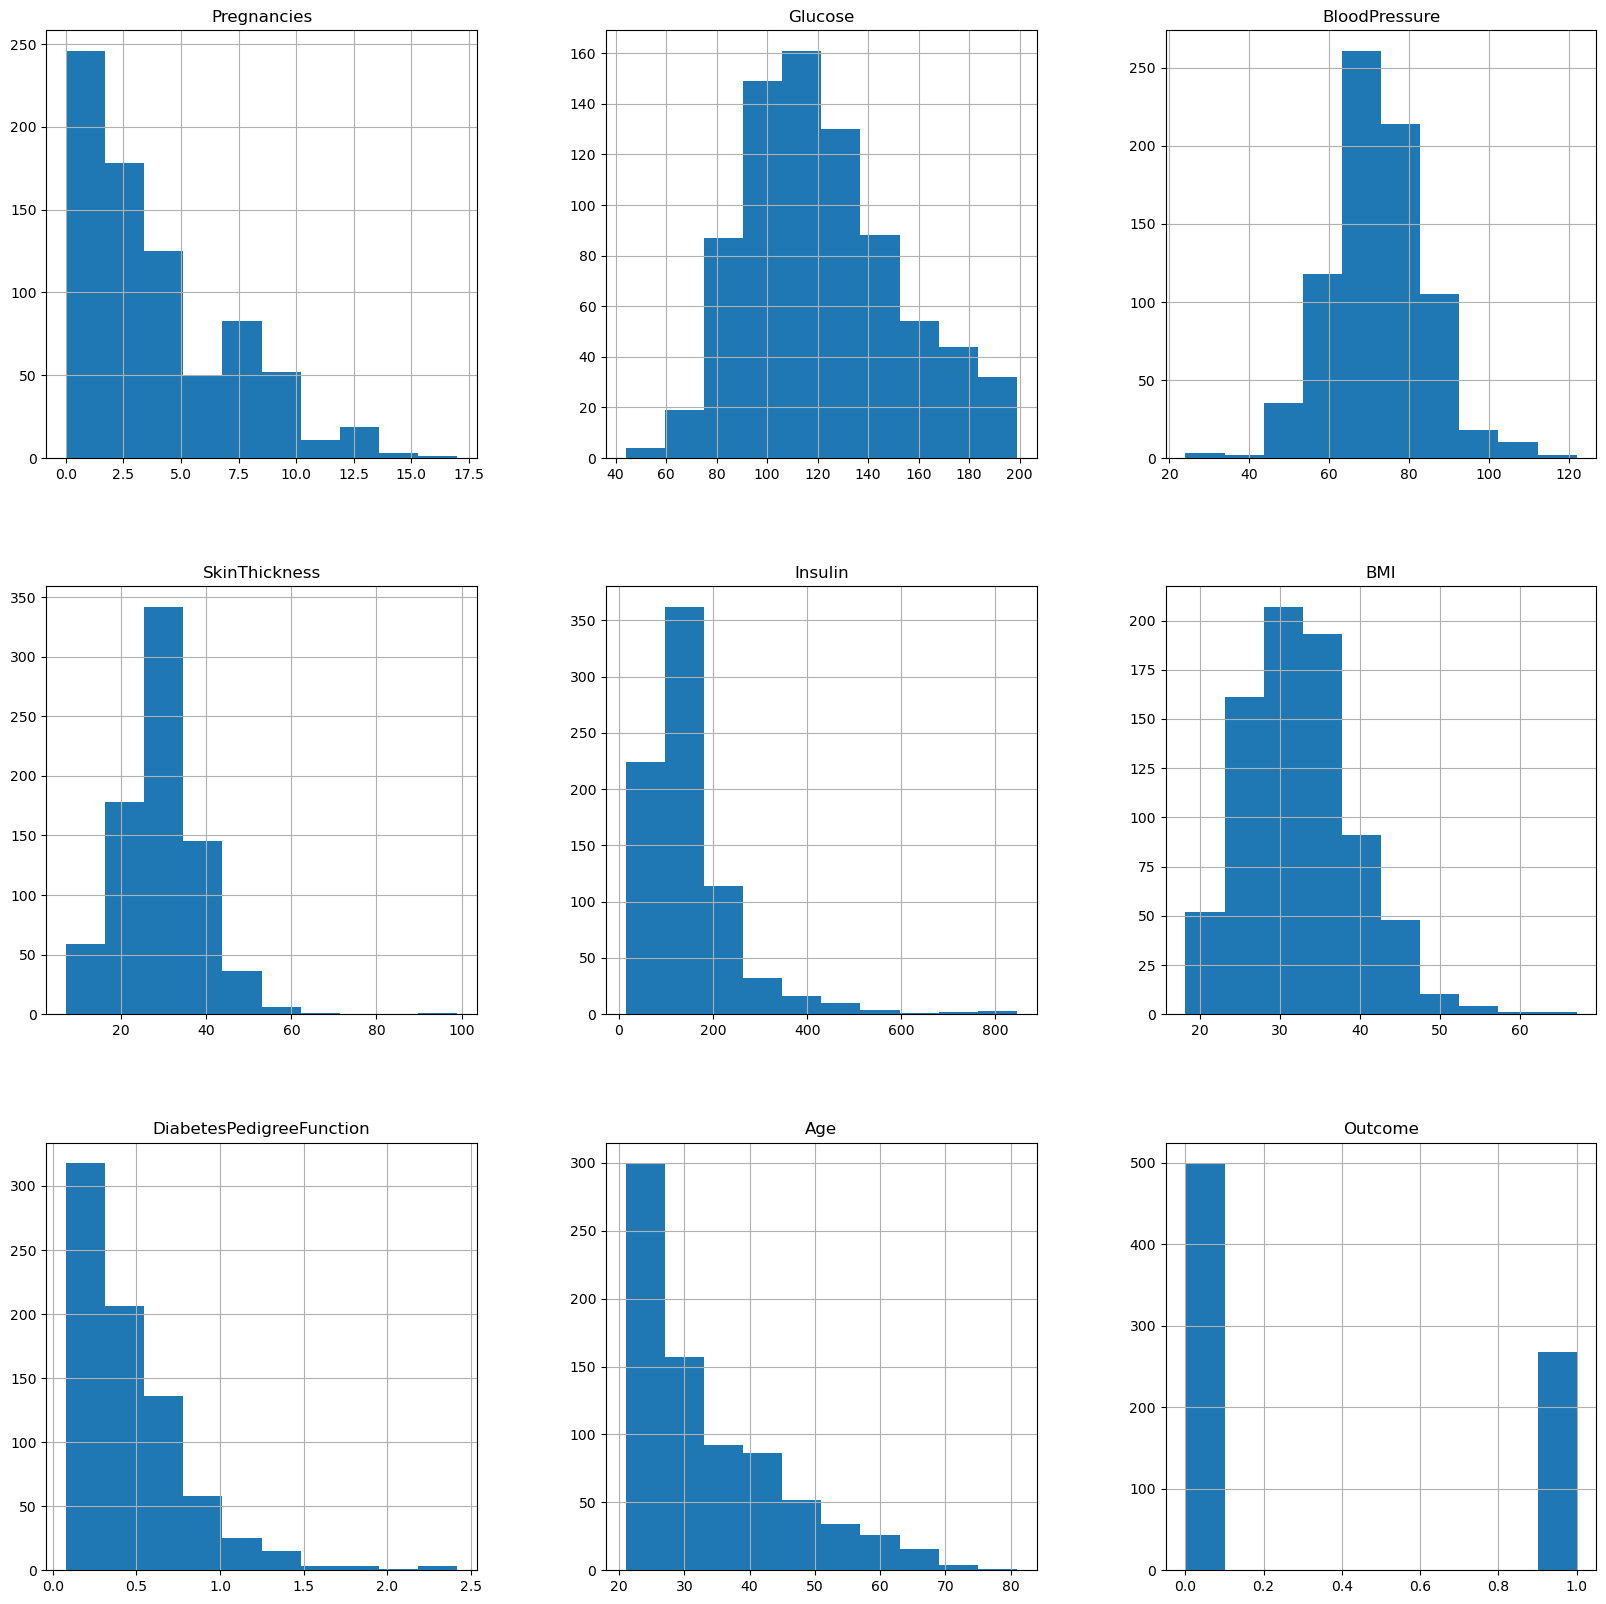

In [16]:
p = db.hist(figsize = (20,20))


## Zero null after imputing

In [10]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Check Balance for Outcome

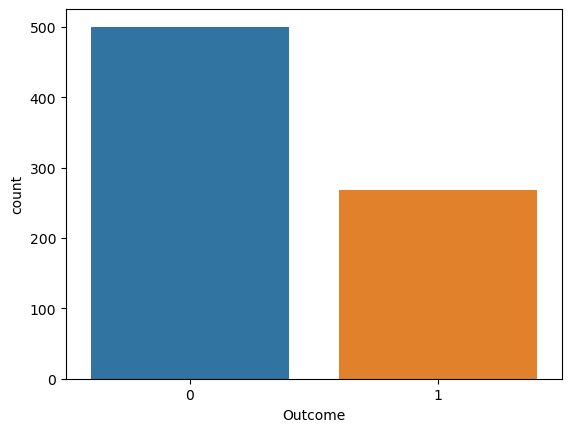

In [17]:
#  Unbalanced Outcome , need SMOTE

sns.countplot(data=db, x="Outcome")
  
plt.show()

In [18]:
db['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## Pairplot

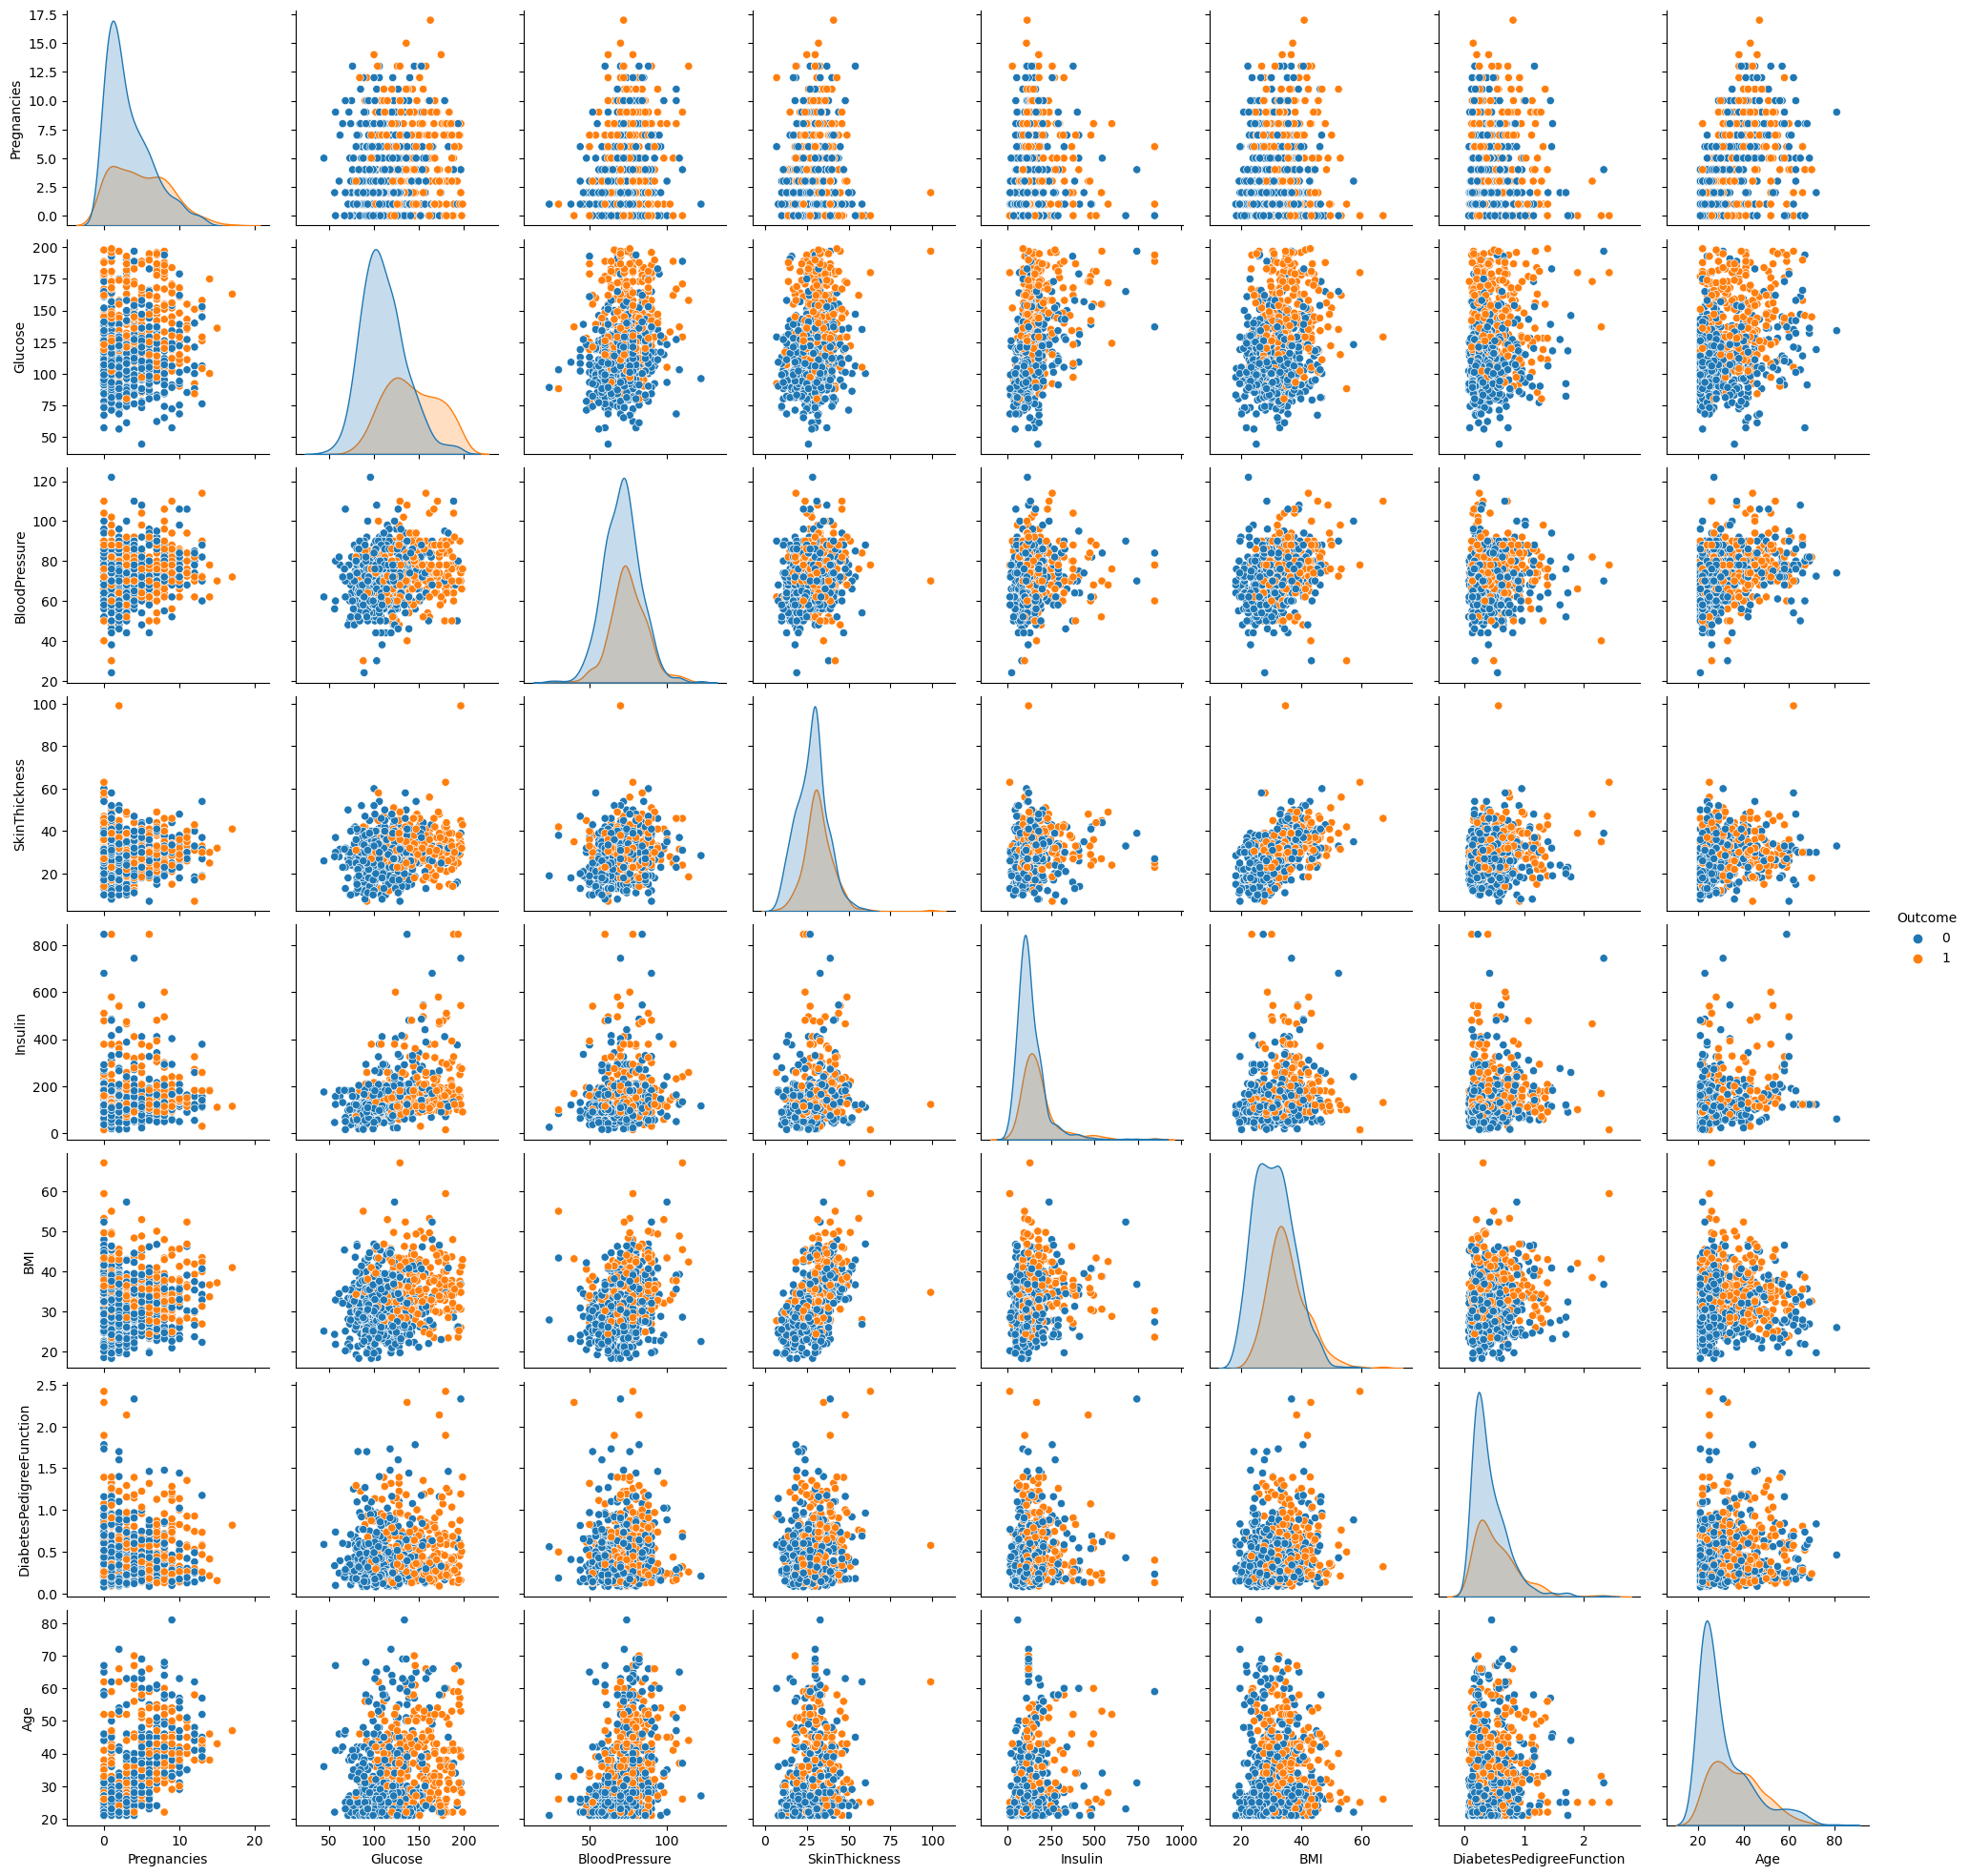

In [48]:
p=sns.pairplot(db, hue = 'Outcome')

## EDA

### Age & Diabetes

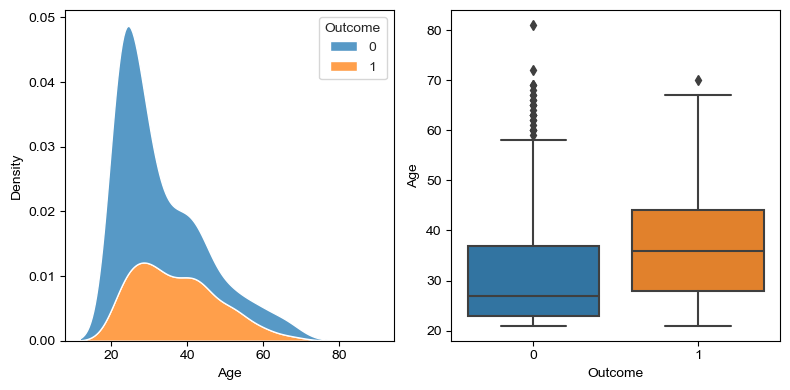

In [19]:
# There is a higher proportional of younger females with diabetes.
# Diabetes has a higher median age than non diabetes. 
# https://www.medicalnewstoday.com/articles/317375

fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="Age", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="Age", x="Outcome")

fig.tight_layout()

plt.show()

### Glucose & Diabetes

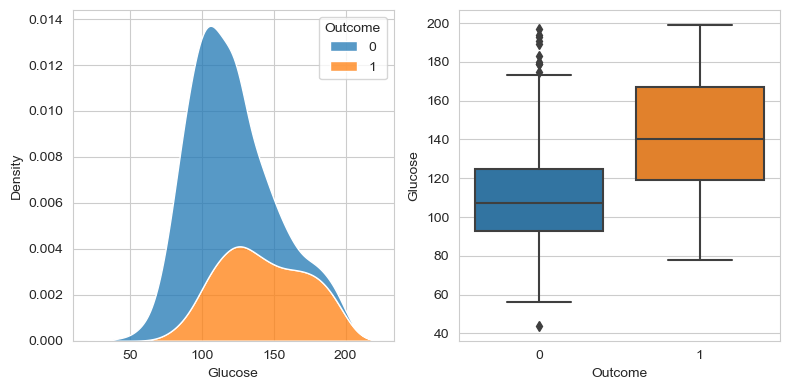

In [20]:
# Diabetes has of high proportion btw the 120 to 140 lvl
# Diabetes has a higher median Glucose than non diabetes. 


fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="Glucose", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="Glucose", x="Outcome")

fig.tight_layout()

plt.show()

### Pregnancies & Diabetes

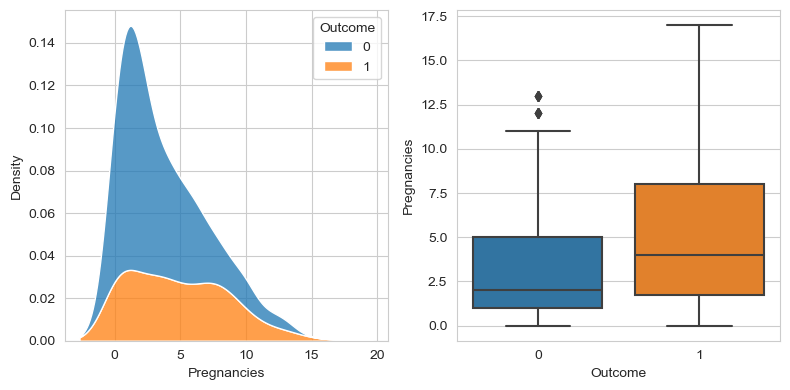

In [21]:
# Observable mean no  of pregancies between diabetes and non-diabetes

fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="Pregnancies", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="Pregnancies", x="Outcome")

fig.tight_layout()

plt.show()

### Blood Pressure & Diabetes

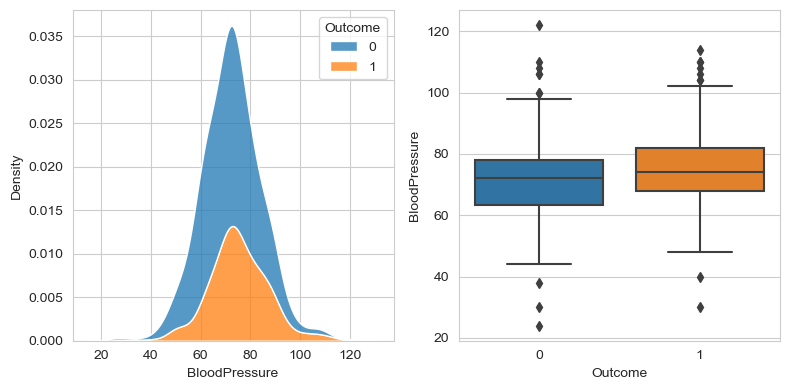

In [22]:
# Diabetes has a higher IQR of Diastolic Blood Pressure.
# Btw 90 & 120 are consider stage 2 hypertension.

fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="BloodPressure", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="BloodPressure", x="Outcome")

fig.tight_layout()

plt.show()

### SkinThickness & Diabetes

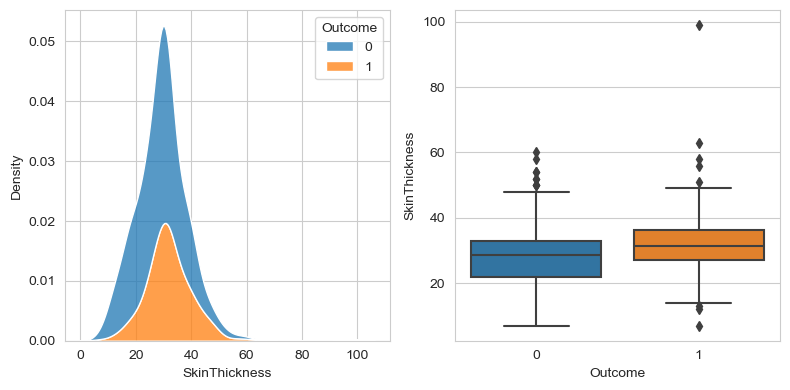

In [23]:
# Tricep skin thickness promonient peak between 27 to 33 mm region
# Small difference in median value for both groups

fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="SkinThickness", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="SkinThickness", x="Outcome")

fig.tight_layout()

plt.show()

### Insulin & Diabetes

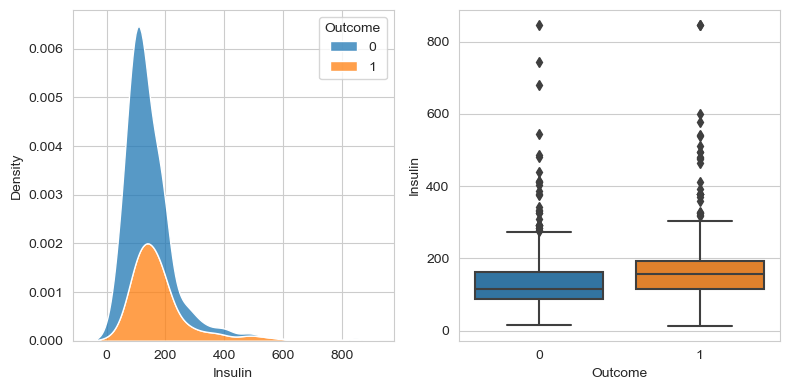

In [24]:
# Insulin lvl median value are higher for diabetes and peaks ard the 130 lvl

fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="Insulin", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="Insulin", x="Outcome")

fig.tight_layout()

plt.show()

### BMI & Diabetes

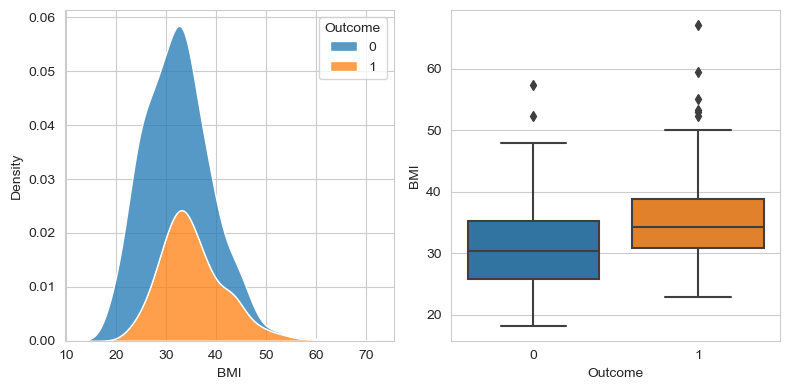

In [25]:
#BMI median values have observable difference between the diabetes and non-diabetes and it peaks aound the 30 to 35 lvl. 
#Domain Knowledge:Higher the BMI levels, more is the obesity and thus leads to type 2 diabetes. 
#Usually, value above 30 may prompt towards diabetes.
#https://www.verywellhealth.com/obesity-and-diabetes-6823190


fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="BMI", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="BMI", x="Outcome")

fig.tight_layout()

plt.show()

### DiabetesPedigreeFunction & Diabetes

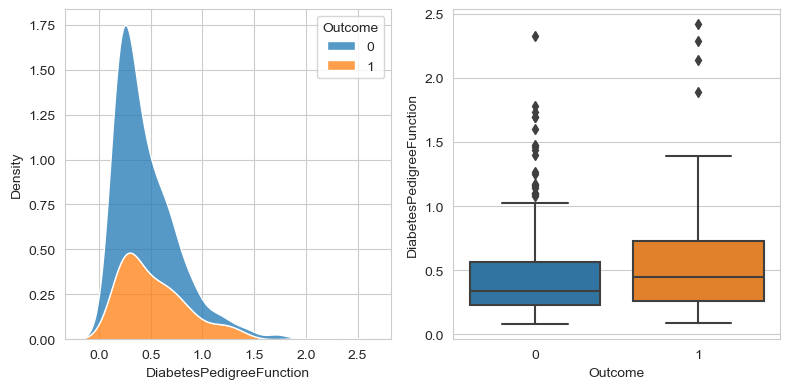

In [26]:
# Diabetes has a peak at 0.3 to 0.4 DPF

fig,axes = plt.subplots(1,2,figsize = (8,4))

sns.set_style('whitegrid')

sns.kdeplot(ax=axes[0], data=db, x="DiabetesPedigreeFunction", hue="Outcome", multiple="stack")

sns.boxplot(ax=axes[1], data=db, y="DiabetesPedigreeFunction", x="Outcome")

fig.tight_layout()

plt.show()

## Check for correlation between variables

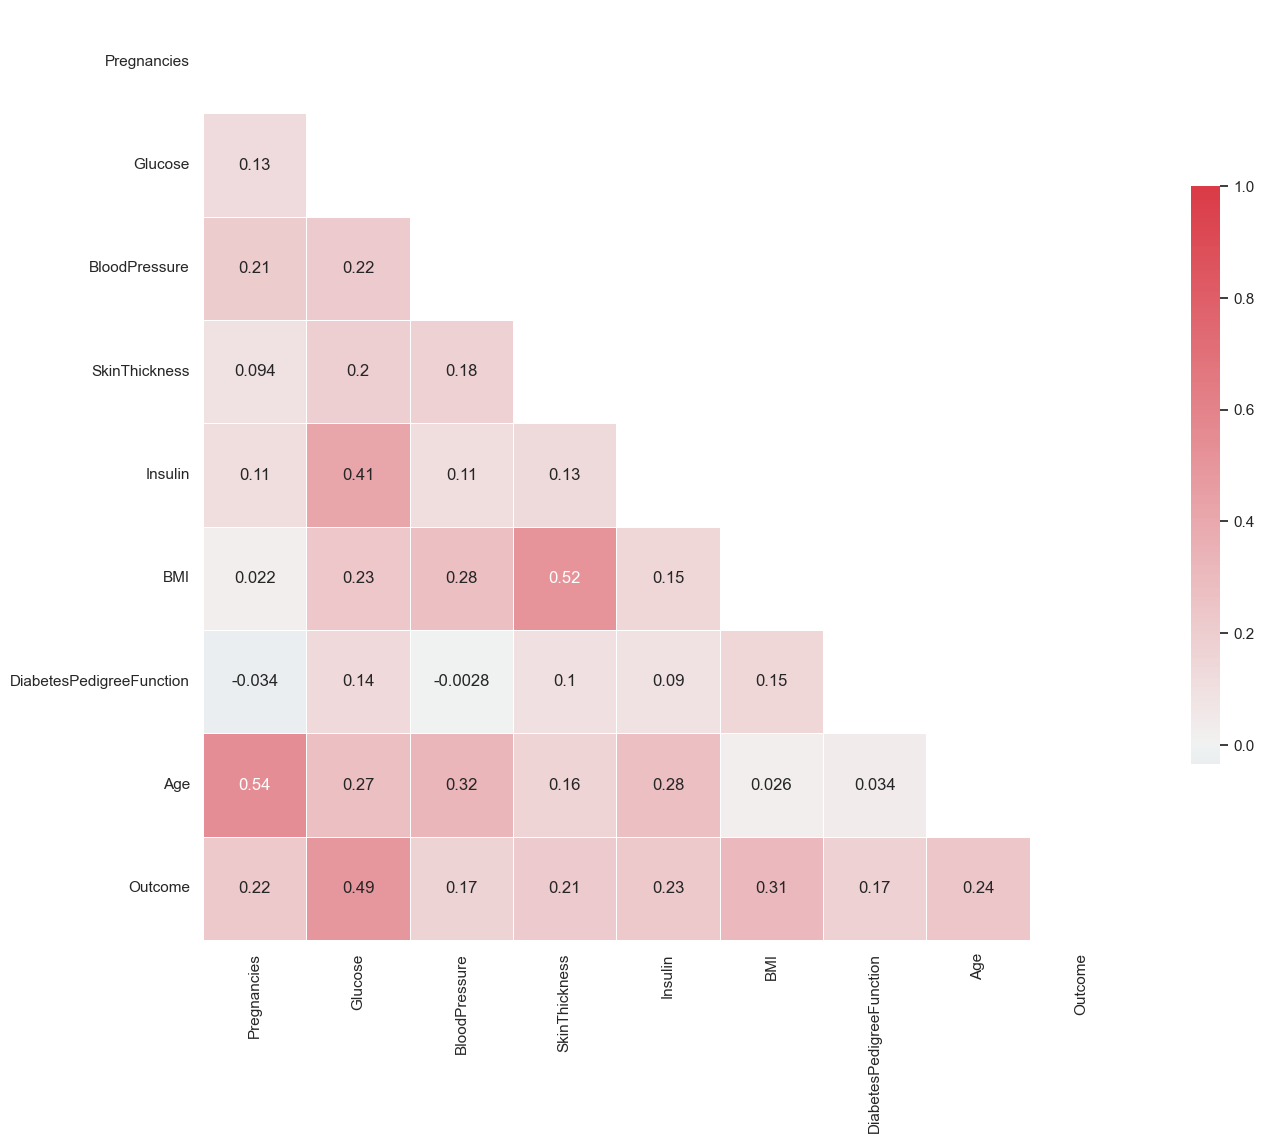

In [27]:
# Copied code from seaborn examples: another good way to show Correlation
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(db.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(db.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

In [11]:
db.corr()[['Outcome']].apply(np.abs).sort_values('Outcome', ascending=False)

,Outcome
Outcome,1.000000
Glucose,0.492928
BMI,0.312038
Age,0.238356
Insulin,0.228244
Pregnancies,0.221898
SkinThickness,0.213632
DiabetesPedigreeFunction,0.173844
BloodPressure,0.166074


## Create Model

In [12]:
predictor_columns = [c for c in db.columns if c != 'Outcome']
target_column = 'Outcome'

# Load the dataset as a pandas data frame
X = pd.DataFrame(db, columns = predictor_columns)
y = db[target_column]

In [13]:
# USE SCIKIT LEARN RFE TO SELECT X TOP FEATURES
# Skin thickness & Insulin least important ?


from sklearn.feature_selection import RFE
estimator = LogisticRegression(solver='liblinear', random_state=0)
selector = RFE(estimator, n_features_to_select= 6, step=1 )
selector = selector.fit(X, y)

#selector.support_
print(selector.ranking_)
print(selector.support_)
print(selector.feature_names_in_)

cols = selector.get_support(indices=True)
X = db.iloc[:,cols]
print(X)

[1 1 1 2 3 1 1 1]
[ True  True  True False False  True  True  True]
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']
     Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age
0              6    148.0           72.0  33.6                     0.627   50
1              1     85.0           66.0  26.6                     0.351   31
2              8    183.0           64.0  23.3                     0.672   32
3              1     89.0           66.0  28.1                     0.167   21
4              0    137.0           40.0  43.1                     2.288   33
..           ...      ...            ...   ...                       ...  ...
763           10    101.0           76.0  32.9                     0.171   63
764            2    122.0           70.0  36.8                     0.340   27
765            5    121.0           72.0  26.2                     0.245   30
766            1    126.0           60.0  30

In [14]:
# SPLIT DATA INTO TRAINING AND TEST DATA 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=None, stratify=y, random_state=0)


# STANDARDISE TRAINING DATA  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# FIT on training set only.
scaler.fit(X_train)


# APPLY TRANSFORM to both the training set AND the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)




In [15]:
# HANDLE IMBALANCED TRAINING DATA

from imblearn.over_sampling import SMOTE 

model = SMOTE(random_state=42)
X_train, y_train = model.fit_resample(X_train, y_train)  # this gives the Resampled X and Y-training data

In [16]:
#check new no of rows

print(len(X_train), len(X_test))

750 192


In [34]:

print(len(y_train), len(y_test))

750 192


In [17]:
# Confirm Training Data is now balanced

y_train.value_counts(normalize= True)  

0    0.5
1    0.5
Name: Outcome, dtype: float64

In [18]:
# Check that test data remains unbalanced 

y_test.value_counts(normalize= True)  

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [37]:
print(X_train)

[[-8.77816622e-01 -1.39161573e+00  1.21813048e-01 -3.43280417e-01
   1.60307478e-01 -9.80244375e-01]
 [-5.84872025e-01 -9.41685272e-02 -9.54397716e-03 -1.88272271e+00
   1.05792717e+00  3.20337122e+00]
 [ 1.75868475e+00 -2.27240036e-01 -9.54397716e-03 -2.82683380e-03
  -6.22534613e-01 -3.10865881e-01]
 ...
 [ 3.90298496e-01  1.29925578e-01  6.16003124e-01  1.53810364e+00
  -4.76903912e-01  5.22485942e-01]
 [ 9.84914597e-01 -1.88919410e-01 -3.47898253e-01 -7.74618067e-02
  -7.10526383e-01  5.73166640e-01]
 [ 3.63538760e-01  3.54116719e-01 -1.65778618e-01  3.43178963e-01
   2.09688762e-01 -4.37071113e-01]]


In [38]:
print(y_train)

0      0
1      0
2      1
3      1
4      0
      ..
745    1
746    1
747    1
748    1
749    1
Name: Outcome, Length: 750, dtype: int64


# Machine Learning Models

## Logistic Regression

In [31]:
%%time
model_lr = LogisticRegression(solver='liblinear', random_state=0) 
model_lr.fit(X_train, y_train)   
y_predictlr= model_lr.predict(X_test) 
model_lr.predict_proba(X_test)

score_lrtest  = model_lr.score(X_test, y_test) 
score_lrtrain = model_lr.score(X_train,y_train) 
print(f' Test Data Score     {round(score_lrtest,5)}')
print(f' Training Data Score  {round(score_lrtrain,5)}')
print(classification_report(y_test,y_predictlr))


 Test Data Score     0.78646
 Training Data Score  0.73733
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       125
           1       0.67      0.76      0.71        67

    accuracy                           0.79       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.79      0.79       192

CPU times: total: 0 ns
Wall time: 5.41 ms


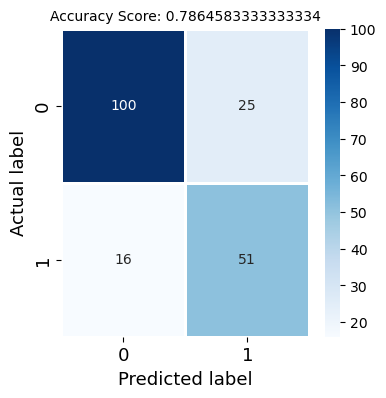

In [20]:
cm = metrics.confusion_matrix(y_test, y_predictlr)
plt.figure(figsize=(4,4)) #print out seaborn heatmap of Confusion matrix
sns.heatmap(cm,annot=True,fmt="d", cmap="Blues", linewidths= 1);
plt.ylabel('Actual label', fontsize = 13);
plt.xlabel('Predicted label', fontsize = 13);
plt.title('Accuracy Score: {}'.format(score_lrtest), size = 10);
plt.tick_params(labelsize= 13)

## Support Vector Machine

In [32]:
%%time
model_svm = svm.SVC(kernel='linear', C=1,probability=True) 
svc= model_svm.fit(X_train, y_train) 
 
y_predictsvm = model_svm.predict(X_test) 
model_svm.predict_proba(X_test) 

score_svmtest= model_svm.score(X_test, y_test) # all classification models use ACCURACY as score
score_svmtrain = model_svm.score(X_train,y_train) # do a score based on training so you can compare score from Train and Test to check overfitting.

print(f' Test Data Score     {round(score_svmtest,5)}')
print(f' Training Data Score  {round(score_svmtrain,5)}')
print(classification_report(y_test, y_predictsvm)) 

 Test Data Score     0.77083
 Training Data Score  0.73333
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       125
           1       0.65      0.73      0.69        67

    accuracy                           0.77       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.78      0.77      0.77       192

CPU times: total: 78.1 ms
Wall time: 84.4 ms


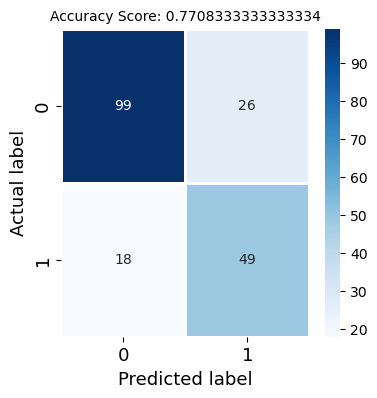

In [22]:
cmsvm = metrics.confusion_matrix(y_test, y_predictsvm)
plt.figure(figsize=(4,4)) #print out seaborn heatmap of Confusion matrix
sns.heatmap(cmsvm,annot=True,fmt="d", cmap="Blues", linewidths= 1);
plt.ylabel('Actual label', fontsize = 13);
plt.xlabel('Predicted label', fontsize = 13);
plt.title('Accuracy Score: {}'.format(score_svmtest), size = 10);
plt.tick_params(labelsize= 13)

## Gaussian Naive Bayes

In [33]:
%%time
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_predictNBG = model_naive.predict(X_test)
y_predprobNBG= model_naive.predict_proba(X_test)[:,1] 

score_naivetest= model_naive.score(X_test, y_test)
score_naivetrain = model_naive.score(X_train,y_train)  

print(f'Test Data Score     {round(score_naivetest,5)}')
print(f'Training Data Score {round(score_naivetrain,5)}')
print(classification_report(y_test, y_predictNBG)) 

Test Data Score     0.75
Training Data Score 0.72933
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       125
           1       0.63      0.69      0.66        67

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.76      0.75      0.75       192

CPU times: total: 0 ns
Wall time: 4.5 ms


## K-Nearest Neighbors

In [34]:
%%time
KNN = KNeighborsClassifier(n_neighbors=20)
KNN.fit(X_train, y_train)
y_predictKNN = KNN.predict(X_test)
y_predprobKNN= KNN.predict_proba(X_test)[:,1] 


score_KNNtest= KNN.score(X_test, y_test)
score_KNNtrain = KNN.score(X_train,y_train)  


print(f'Test Data Score     {round(score_KNNtest,5)}')
print(f'Training Data Score {round(score_KNNtrain,5)}')
print(classification_report(y_test, y_predictKNN)) 




Test Data Score     0.71354
Training Data Score 0.82933
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       125
           1       0.58      0.67      0.62        67

    accuracy                           0.71       192
   macro avg       0.69      0.70      0.70       192
weighted avg       0.73      0.71      0.72       192

CPU times: total: 15.6 ms
Wall time: 41.2 ms


## Random Forest

In [41]:

%%time
rf = RandomForestClassifier(n_estimators = 7, random_state = 1, n_jobs=-1)
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)
y_predprobrf = rf.predict_proba(X_test)

score_rftest= rf.score(X_test, y_test)
score_rftrain = rf.score(X_train,y_train) 

print(f'Test Data Score     {round(score_rftest,5)}')
print(f'Training Data Score {round(score_rftrain,5)}')
print(classification_report(y_test,y_predrf))

Test Data Score     0.72917
Training Data Score 0.97467
              precision    recall  f1-score   support

           0       0.81      0.76      0.79       125
           1       0.60      0.67      0.63        67

    accuracy                           0.73       192
   macro avg       0.71      0.72      0.71       192
weighted avg       0.74      0.73      0.73       192

CPU times: total: 0 ns
Wall time: 33.7 ms


# Gridsearch

### Best Parameter for Logistic Regression

In [55]:
lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr_gs = GridSearchCV(LogisticRegression(solver = "liblinear" ), lr_params, cv=5, verbose=2, error_score ='raise', scoring='f1_macro' )
lr_gs.fit(X_train, y_train)
print(lr_gs.best_estimator_)
print(lr_gs.best_params_)
print(lr_gs.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l1; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ....................................C=1, penalty=l2; total time=   0.0s
[CV] END ...................................C=10, penalty=l1; total time=   0.0s
[CV] END ...................................C=10,

## Logistic Regression After Grid Search

In [36]:
%%time

#LR after Gridsearch

model_lrgs = LogisticRegression(solver='liblinear',C=1, random_state=0, penalty= 'l1') 
model_lrgs.fit(X_train, y_train)   
y_predictlrgs= model_lrgs.predict(X_test) 
y_predproblrgs= model_lrgs.predict_proba(X_test)[:,1]  

score_lrgstest  = model_lrgs.score(X_test, y_test) 
score_lrgstrain = model_lrgs.score(X_train,y_train) 

print(f'Score for Test Data      {score_lrgstest}')
print(f'Score for Training Data  {round(score_lrgstrain,5)}')
print(classification_report(y_test, y_predictlrgs))

Score for Test Data      0.7864583333333334
Score for Training Data  0.73733
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       125
           1       0.67      0.76      0.71        67

    accuracy                           0.79       192
   macro avg       0.77      0.78      0.77       192
weighted avg       0.80      0.79      0.79       192

CPU times: total: 0 ns
Wall time: 7.58 ms


## Best Parameter for Support Vector Machine

In [59]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

In [60]:
from sklearn.svm import SVC

svc_gs = GridSearchCV(SVC(probability=True), svc_params, cv=5, verbose=2, scoring='f1_macro')
svc_gs.fit(X_train, y_train)

print(svc_gs.best_estimator_)
print(svc_gs.best_params_)
print(svc_gs.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .......................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, kernel=linear; total time=   0.0s
[CV] END ...................C=1, gamma=0.0001, k

## SVM after Grid Search

In [37]:
%%time

model_svmgs = svm.SVC(kernel='rbf', C=100,gamma=0.001,probability=True) 
svc= model_svmgs.fit(X_train, y_train) 
 
y_predictsvmgs = model_svmgs.predict(X_test) 
y_predprobsvmgs = model_svmgs.predict_proba(X_test)[:,1] 

score_svmtestgs= model_svmgs.score(X_test, y_test) 
score_svmtraings = model_svmgs.score(X_train,y_train) 

print(f' Test Data Score     {round(score_svmtestgs,5)}')
print(f' Training Data Score  {round(score_svmtraings,5)}')
print(classification_report(y_test, y_predictsvmgs))

 Test Data Score     0.76042
 Training Data Score  0.73733
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       125
           1       0.64      0.70      0.67        67

    accuracy                           0.76       192
   macro avg       0.74      0.75      0.74       192
weighted avg       0.77      0.76      0.76       192

CPU times: total: 109 ms
Wall time: 138 ms


## Best Parameter K-Nearest Neighbors

In [88]:
test_acc = []
train_acc =[]
for i in range(5,50):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, y_train)
    test_acc.append(KNN.score(X_test, y_test))
    train_acc.append(KNN.score(X_train, y_train))


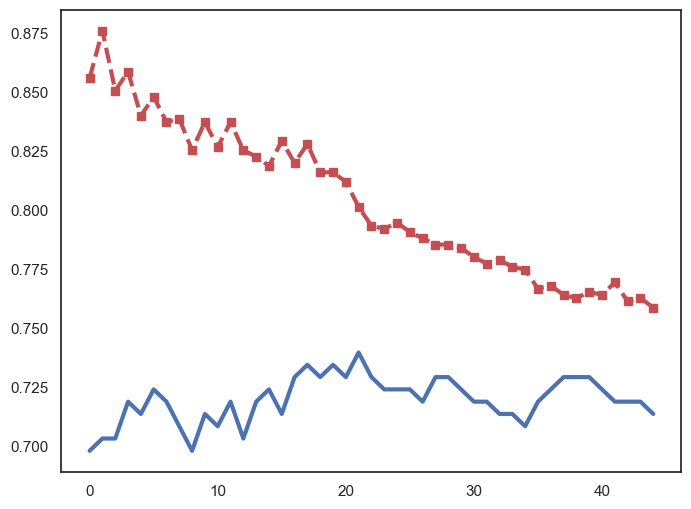

In [89]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(test_acc, lw=3.)
ax.plot(train_acc, 'rs',lw=3., ls='--')
plt.show()

## KNN after Grid Search

In [38]:
%%time
KNN = KNeighborsClassifier(n_neighbors=26)
KNN.fit(X_train, y_train)
y_predictKNN = KNN.predict(X_test)
y_predprobKNN= KNN.predict_proba(X_test)[:,1] 


score_KNNtest= KNN.score(X_test, y_test)
score_KNNtrain = KNN.score(X_train,y_train)  


print(f'Test Data Score     {round(score_KNNtest,5)}')
print(f'Training Data Score {round(score_KNNtrain,5)}')
print(classification_report(y_test, y_predictKNN)) 

Test Data Score     0.73958
Training Data Score 0.80133
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       125
           1       0.60      0.75      0.67        67

    accuracy                           0.74       192
   macro avg       0.72      0.74      0.73       192
weighted avg       0.76      0.74      0.74       192

CPU times: total: 31.2 ms
Wall time: 45.5 ms


In [90]:
# KNN = KNeighborsClassifier(n_neighbors=28)
# KNN.fit(X_train, y_train)
# y_predictKNN = KNN.predict(X_test)
# y_predprobKNN= KNN.predict_proba(X_test)[:,1] 


# score_KNNtest= KNN.score(X_test, y_test)
# score_KNNtrain = KNN.score(X_train,y_train)  


# print(f'Test Data Score     {round(score_KNNtest,5)}')
# print(f'Training Data Score {round(score_KNNtrain,5)}')
# print(classification_report(y_test, y_predictKNN)) 

Test Data Score     0.72917
Training Data Score 0.812
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       125
           1       0.59      0.75      0.66        67

    accuracy                           0.73       192
   macro avg       0.71      0.73      0.72       192
weighted avg       0.75      0.73      0.73       192



Fitting 5 folds for each of 30 candidates, totalling 150 fits


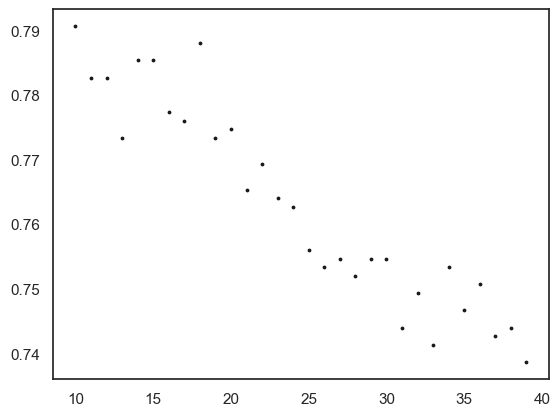

In [68]:
# k_range = list(range(10, 40))
# param_grid = dict(n_neighbors= k_range)
  
# # defining parameter range
# grid = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
  
# # fitting the model for grid search
# grid.fit(X_train, y_train)

# grid_mean_scores = grid.cv_results_['mean_test_score']

# plt.scatter(k_range, grid_mean_scores, color ='k', s=3)

# plt.show()


## Best parameter for Random Forest

In [99]:
#GRIDSEARCH ON RANDOM FOREST

rf_params = {
    'n_estimators': [80,90,100,110,120],
    'max_depth':[5,6,7,8,9],
    'ccp_alpha':[.001,.002,.003],
    'class_weight':('balanced','balanced_subsample'),
    'criterion' : ['gini', 'entropy']
}

rf_gs = GridSearchCV(RandomForestClassifier(random_state=1, bootstrap=True, oob_score=True), rf_params, cv=5, verbose=3, 
                     n_jobs=-1, scoring = ['recall', 'precision'], refit = 'recall', return_train_score=True)
rf_gs.fit(X_train, y_train)

# USE TQDM to check progress of processing
from tqdm import tqdm
for i in tqdm (range(2)):     # tqdm tracks progress of processing, useful in running loops
    best_svc = rf_gs.best_estimator_
    print(rf_gs.best_params_)
    print(rf_gs.best_score_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


100%|██████████| 2/2 [00:00<?, ?it/s]

{'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}
0.8800000000000001
{'ccp_alpha': 0.001, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 100}
0.8800000000000001


## Random Forest after Grid Search

In [39]:
%%time
rfgs = RandomForestClassifier(n_estimators = 100, random_state = 1,ccp_alpha = 0.001, class_weight = 'balanced', criterion= 'entropy', max_depth= 7, n_jobs=-1)
rfgs.fit(X_train, y_train)
y_predrfgs = rfgs.predict(X_test)
y_predprobrfgs = rfgs.predict_proba(X_test)

score_rfgstest= rfgs.score(X_test, y_test)
score_rfgstrain = rfgs.score(X_train,y_train) 

print(f'Test Data Score     {round(score_rfgstest,5)}')
print(f'Training Data Score {round(score_rfgstrain,5)}')
print(classification_report(y_test,y_predrfgs))

Test Data Score     0.77083
Training Data Score 0.912
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       125
           1       0.65      0.73      0.69        67

    accuracy                           0.77       192
   macro avg       0.75      0.76      0.75       192
weighted avg       0.78      0.77      0.77       192

CPU times: total: 62.5 ms
Wall time: 191 ms


## ROC AUC Curve Summary

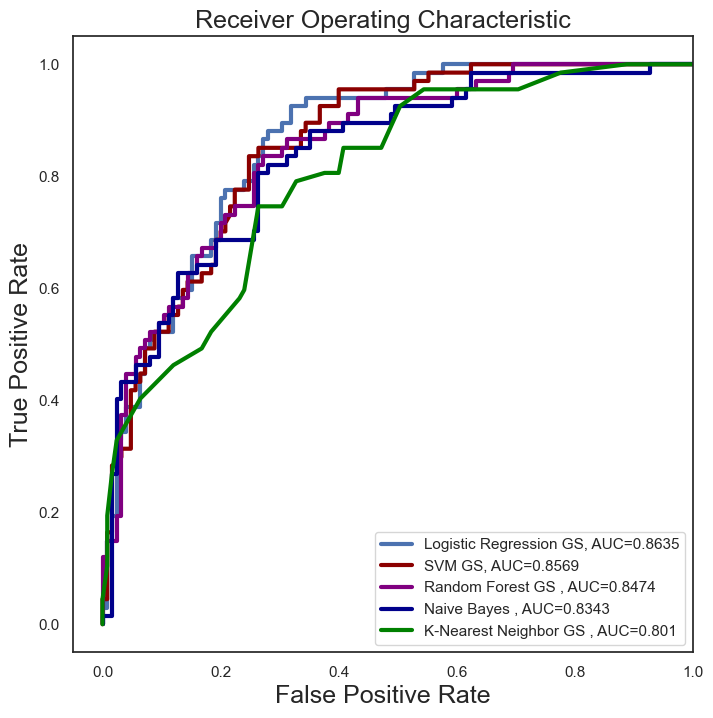

In [106]:
#LRGS
model_lrgs = LogisticRegression(solver='liblinear',C=1, random_state=0, penalty= 'l1') 
model_lrgs.fit(X_train, y_train)   
y_predproblrgs= model_lrgs.predict_proba(X_test)[:,1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_predproblrgs)
auclog = round(metrics.roc_auc_score(y_test, y_predproblrgs), 4)


#SVMGS
model_svmgs = svm.SVC(kernel='rbf', C=100,gamma=0.001,probability=True) 
svc= model_svmgs.fit(X_train, y_train)  
y_predprobsvmgs = model_svmgs.predict_proba(X_test)[:,1] 
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, y_predprobsvmgs)
aucsvm = round(metrics.roc_auc_score(y_test, y_predprobsvmgs), 4)


#GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)
y_predprobNBG= model_naive.predict_proba(X_test)[:,1] 
fpr_NBG, tpr_NBG, _ = metrics.roc_curve(y_test, y_predprobNBG)
aucnaive = round(metrics.roc_auc_score(y_test, y_predprobNBG), 4)


#KNNGS
KNNgs = KNeighborsClassifier(n_neighbors=26)
KNNgs.fit(X_train, y_train)
y_predprobKNN= KNNgs.predict_proba(X_test)[:,1] 
fpr_KNN, tpr_KNN, _ = metrics.roc_curve(y_test, y_predprobKNN)
aucknn = round(metrics.roc_auc_score(y_test, y_predprobKNN), 4)


#Random Forest

rfgs = RandomForestClassifier(n_estimators = 100, random_state = 1,ccp_alpha = 0.001, class_weight = 'balanced', criterion= 'entropy', max_depth= 7, n_jobs=-1)
rfgs.fit(X_train, y_train)
y_predprobrfgs = rfgs.predict_proba(X_test)[:,1] 
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test, y_predprobrfgs)
aucrf = round(metrics.roc_auc_score(y_test, y_predprobrfgs), 4)



plt.figure(figsize=[8,8])
plt.plot(fpr,tpr,label="Logistic Regression GS, AUC="+str(auclog), linewidth=3);
plt.plot(fpr_svm,tpr_svm,label="SVM GS, AUC="+str(aucsvm),linewidth=3, color='darkred');
plt.plot(fpr_rf,tpr_rf,label="Random Forest GS , AUC="+str(aucrf),linewidth=3, color='purple')
plt.plot(fpr_NBG,tpr_NBG,label="Naive Bayes , AUC="+str(aucnaive),linewidth=3, color='darkblue');
plt.plot(fpr_KNN,tpr_KNN,label="K-Nearest Neighbor GS , AUC="+str(aucknn),linewidth=3, color='green');



plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic', fontsize=18)
plt.legend(loc="lower right")
plt.show()